In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

warnings.filterwarnings('ignore')


C:\Anaconda\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [49]:
#Import ‘weather-data.csv’ as DataFrame.
pc = pd.read_csv("pc-sg.csv")
pc.head(2)


,Port,Year,Week,Commercial Market,Commercial Size Class,Median Waiting Time Off Port Limits,Waiting Time Off Port Limits Confidence Score,Median Time At Port,Time At Port Confidence Score,Median Waiting Time Off Port Limits Standard Deviation,Time At Port Standard Deviation,Median Waiting Time Off Port Limits Difference (week-to-week),Waiting Time Off Port Limits % Difference (week-to-week),Time At Port Difference (week-to-week),Time At Port % Difference (week-to-week),Number Of Calls,Number Of Vessels,Port Country,Unlocode
0,Tanah merah,2022,24,ALL,ALL,0.9,HIGH,0.0,HIGH,0.4,0.1,-0.1,-10.0,0.0,0.0,16,2,Singapore,NaN
1,Singapore,2022,24,ALL,ALL,0.9,HIGH,0.8,HIGH,4.2,3.8,0.1,12.5,0.0,0.0,962,653,Singapore,SGSIN


In [50]:
pc.columns = pc.columns.str.replace(' ','_')

In [51]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 19 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Port                                                           146 non-null    object 
 1   Year                                                           146 non-null    int64  
 2   Week                                                           146 non-null    int64  
 3   Commercial_Market                                              146 non-null    object 
 4   Commercial_Size_Class                                          146 non-null    object 
 5   Median_Waiting_Time_Off_Port_Limits                            141 non-null    float64
 6   Waiting_Time_Off_Port_Limits_Confidence_Score_                 146 non-null    object 
 7   Median_Time_At_Port                                           

In [52]:
pc = pc.drop(['Commercial_Market','Commercial_Size_Class','Unlocode'],axis =1) # dropping the unncessary column
pc.head(2)

,Port,Year,Week,Median_Waiting_Time_Off_Port_Limits,Waiting_Time_Off_Port_Limits_Confidence_Score_,Median_Time_At_Port,Time_At_Port_Confidence_Score,Median_Waiting_Time_Off_Port_Limits__Standard_Deviation_,Time_At_Port_Standard_Deviation,Median_Waiting_Time_Off_Port_Limits_Difference_(week-to-week),Waiting_Time_Off_Port_Limits__%_Difference_(week-to-week),Time_At_Port_Difference_(week-to-week),Time_At_Port_%_Difference_(week-to-week),Number_Of_Calls,Number_Of_Vessels,Port_Country
0,Tanah merah,2022,24,0.9,HIGH,0.0,HIGH,0.4,0.1,-0.1,-10.0,0.0,0.0,16,2,Singapore
1,Singapore,2022,24,0.9,HIGH,0.8,HIGH,4.2,3.8,0.1,12.5,0.0,0.0,962,653,Singapore


In [53]:
#Printing 5 point summary 

pc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,146.0,2021.465753,0.500543,2021.0,2021.00,2021.00,2022.00,2022.0
Week,146.0,26.856164,15.406667,1.0,13.25,27.50,40.00,52.0
Median_Waiting_Time_Off_Port_Limits,141.0,0.901418,0.708316,0.0,0.40,0.80,1.20,3.7
Median_Time_At_Port,146.0,0.565753,0.363401,0.0,0.10,0.80,0.80,0.9
Median_Waiting_Time_Off_Port_Limits__Standard_Deviation_,122.0,2.403279,1.771068,0.0,0.90,2.25,3.50,7.7
Time_At_Port_Standard_Deviation,146.0,1.347945,1.686466,0.0,0.10,0.20,2.60,8.3
Median_Waiting_Time_Off_Port_Limits_Difference_(week-to-week),127.0,-0.000787,0.756401,-3.1,-0.20,0.00,0.20,3.0
Waiting_Time_Off_Port_Limits__%_Difference_(week-to-week),129.0,25.034884,121.166407,-100.0,-20.00,0.00,14.30,700.0
Time_At_Port_Difference_(week-to-week),137.0,0.000730,0.063589,-0.1,0.00,0.00,0.00,0.2
Time_At_Port_%_Difference_(week-to-week),137.0,-3.071533,20.484718,-100.0,0.00,0.00,0.00,33.3


In [54]:
print("find null value:",pc.isnull().sum())

find null value: Port                                                              0
Year                                                              0
Week                                                              0
Median_Waiting_Time_Off_Port_Limits                               5
Waiting_Time_Off_Port_Limits_Confidence_Score_                    0
Median_Time_At_Port                                               0
Time_At_Port_Confidence_Score                                     0
Median_Waiting_Time_Off_Port_Limits__Standard_Deviation_         24
Time_At_Port_Standard_Deviation                                   0
Median_Waiting_Time_Off_Port_Limits_Difference_(week-to-week)    19
Waiting_Time_Off_Port_Limits__%_Difference_(week-to-week)        17
Time_At_Port_Difference_(week-to-week)                            9
Time_At_Port_%_Difference_(week-to-week)                          9
Number_Of_Calls                                                   0
Number_Of_Vessels              

In [55]:
# Writing a for loop which will remove all the features with 20%+ Null values and imputing the rest with mean of the feature
cols = pc.columns
feat1=[]
feat2=[]
print("dataframe shape before imputing:",pc.shape)
for i in cols:
    percentage=pc[i].isna().sum()*100/sig.shape[0]
    if percentage>=20:
        feat1.append(i)
        pc.drop(columns=i,axis=1,inplace=True)
    else:
        feat2.append(i)
        f'pc[i].replace(np.NaN,sig[i].mean(),inplace=True)'
print("\ndataframe shape after imputing:",pc.shape)
print("\nfeature for percentage>=20 null::",feat1)
print("\nfeature for percentage<20 null:: ",feat2) 

dataframe shape before imputing: (146, 16)

dataframe shape after imputing: (146, 16)

feature for percentage>=20 null:: []

feature for percentage<20 null::  ['Port', 'Year', 'Week', 'Median_Waiting_Time_Off_Port_Limits', 'Waiting_Time_Off_Port_Limits_Confidence_Score_', 'Median_Time_At_Port', 'Time_At_Port_Confidence_Score', 'Median_Waiting_Time_Off_Port_Limits__Standard_Deviation_', 'Time_At_Port_Standard_Deviation', 'Median_Waiting_Time_Off_Port_Limits_Difference_(week-to-week)', 'Waiting_Time_Off_Port_Limits__%_Difference_(week-to-week)', 'Time_At_Port_Difference_(week-to-week)', 'Time_At_Port_%_Difference_(week-to-week)', 'Number_Of_Calls', 'Number_Of_Vessels', 'Port_Country']


In [56]:
#Getting the correlation matrix to check the correlated columns and delete them

corr = pc.corr()

#Since the correlation is very big to view here so have exported as csv file
corr.to_csv("correlation1.csv")

corr

,Year,Week,Median_Waiting_Time_Off_Port_Limits,Median_Time_At_Port,Median_Waiting_Time_Off_Port_Limits__Standard_Deviation_,Time_At_Port_Standard_Deviation,Median_Waiting_Time_Off_Port_Limits_Difference_(week-to-week),Waiting_Time_Off_Port_Limits__%_Difference_(week-to-week),Time_At_Port_Difference_(week-to-week),Time_At_Port_%_Difference_(week-to-week),Number_Of_Calls,Number_Of_Vessels
Year,1.000000,-0.876607,-0.299927,0.020048,0.113759,0.069768,0.057607,0.065598,-0.056768,-0.068234,0.031336,0.030411
Week,-0.876607,1.000000,0.240932,-0.036731,-0.116419,-0.037768,-0.073505,-0.024529,0.050656,0.029093,-0.035408,-0.035060
Median_Waiting_Time_Off_Port_Limits,-0.299927,0.240932,1.000000,0.444641,0.132593,0.175170,0.513898,0.379187,0.125421,0.186377,0.134164,0.136451
Median_Time_At_Port,0.020048,-0.036731,0.444641,1.000000,0.457173,0.545767,-0.001812,-0.074097,0.140361,0.322572,0.563484,0.567628
Median_Waiting_Time_Off_Port_Limits__Standard_Deviation_,0.113759,-0.116419,0.132593,0.457173,1.000000,0.536403,0.074737,-0.053005,0.022211,0.152546,0.715710,0.718711
Time_At_Port_Standard_Deviation,0.069768,-0.037768,0.175170,0.545767,0.536403,1.000000,-0.041325,-0.143675,0.034877,0.145118,0.703063,0.706354
Median_Waiting_Time_Off_Port_Limits_Difference_(week-to-week),0.057607,-0.073505,0.513898,-0.001812,0.074737,-0.041325,1.000000,0.657406,0.081740,0.037596,-0.004152,-0.003497
Waiting_Time_Off_Port_Limits__%_Difference_(week-to-week),0.065598,-0.024529,0.379187,-0.074097,-0.053005,-0.143675,0.657406,1.000000,0.138747,0.121281,-0.149060,-0.149288
Time_At_Port_Difference_(week-to-week),-0.056768,0.050656,0.125421,0.140361,0.022211,0.034877,0.081740,0.138747,1.000000,0.635249,0.016022,0.019540
Time_At_Port_%_Difference_(week-to-week),-0.068234,0.029093,0.186377,0.322572,0.152546,0.145118,0.037596,0.121281,0.635249,1.000000,0.129266,0.132246


In [57]:
#D. Checking for multi-collinearity in the data

#Removing the highly collinear features from results dataframe

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

#Remove columns having more than 90% correlation
#Both positive and negative correlations are considered here
pc

,Port,Year,Week,Median_Waiting_Time_Off_Port_Limits,Waiting_Time_Off_Port_Limits_Confidence_Score_,Median_Time_At_Port,Time_At_Port_Confidence_Score,Median_Waiting_Time_Off_Port_Limits__Standard_Deviation_,Time_At_Port_Standard_Deviation,Median_Waiting_Time_Off_Port_Limits_Difference_(week-to-week),Waiting_Time_Off_Port_Limits__%_Difference_(week-to-week),Time_At_Port_Difference_(week-to-week),Time_At_Port_%_Difference_(week-to-week),Number_Of_Calls,Number_Of_Vessels,Port_Country
0,Tanah merah,2022,24,0.9,HIGH,0.0,HIGH,0.4,0.1,-0.1,-10.0,0.0,0.0,16,2,Singapore
1,Singapore,2022,24,0.9,HIGH,0.8,HIGH,4.2,3.8,0.1,12.5,0.0,0.0,962,653,Singapore
2,Changi,2022,24,0.1,MEDIUM,0.8,MEDIUM,0.9,0.2,-2.4,-96.0,0.0,0.0,9,5,Singapore
3,Tanah merah,2022,23,1.0,HIGH,0.0,HIGH,0.4,0.1,NaN,NaN,0.0,0.0,12,1,Singapore
4,Singapore,2022,23,0.8,HIGH,0.8,HIGH,3.7,3.1,-0.1,-11.1,0.0,0.0,922,638,Singapore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Tanah merah,2021,27,0.3,MEDIUM,0.0,MEDIUM,0.5,0.1,NaN,NaN,NaN,NaN,5,2,Singapore
142,Singapore,2021,27,1.4,HIGH,0.8,HIGH,2.7,2.3,0.2,16.7,-0.1,-11.1,862,585,Singapore
143,Changi,2021,27,0.8,MEDIUM,0.8,MEDIUM,1.4,0.5,0.1,14.3,0.1,14.3,6,5,Singapore
144,Singapore,2021,26,1.2,HIGH,0.9,HIGH,2.6,3.0,NaN,NaN,NaN,NaN,864,596,Singapore


In [58]:
numeric_data = pc.select_dtypes(include=[np.number])
categorical_data = pc.select_dtypes(exclude=[np.number])

print(numeric_data.shape[1])
print(categorical_data.shape[1])

12
4


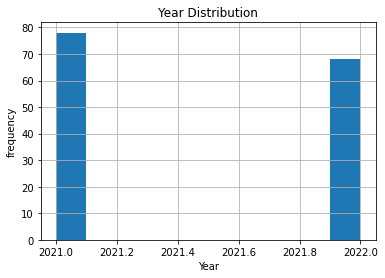

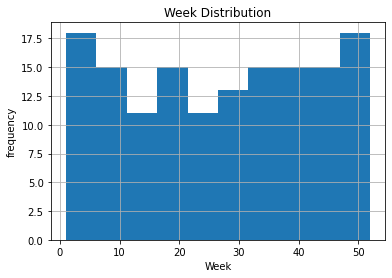

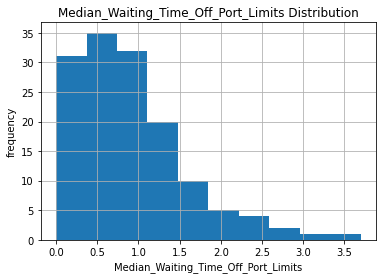

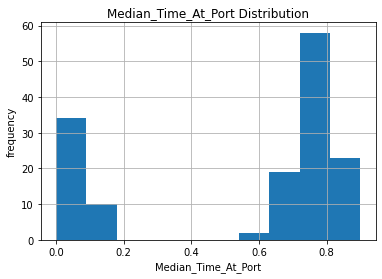

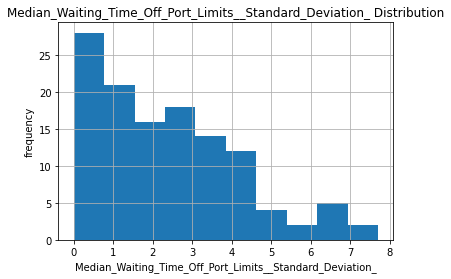

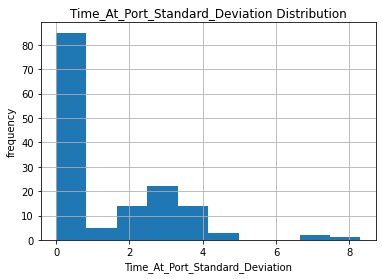

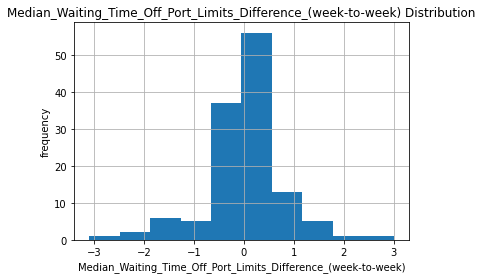

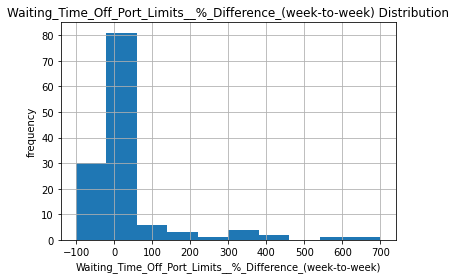

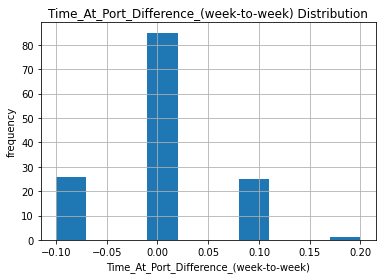

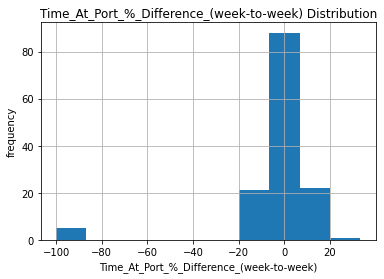

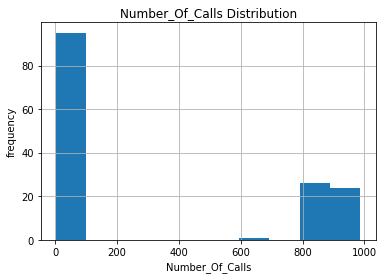

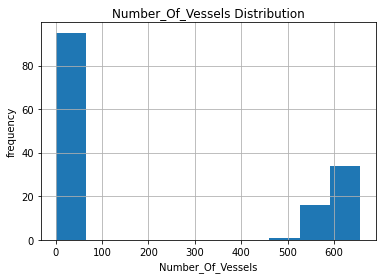

In [60]:
cols=numeric_data.columns
for i, var_name in enumerate(cols):
    pc.hist(column=var_name,bins=10)
    plt.title(var_name+" Distribution")
    plt.xlabel(var_name)
    plt.ylabel("frequency")
#fig.tight_layout()  # Improves appearance a bit.
plt.show()

value_count
 Singapore      51
Changi         51
Tanah merah    44
Name: Port, dtype: int64


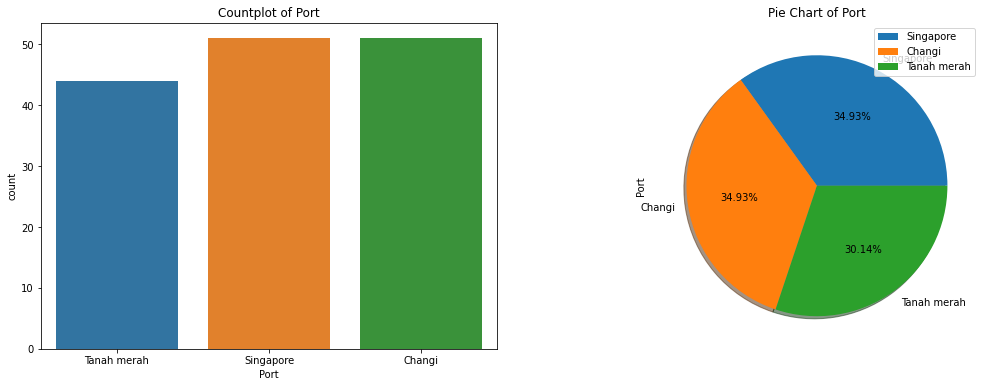

In [61]:
print("value_count\n",pc['Port'].value_counts())
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Countplot of Port')
sns.countplot(sig['Port'])
plt.subplot(1,2,2)
plt.title('Pie Chart of Port')
pc['Port'].value_counts().plot.pie(shadow=True, autopct='%1.2f%%')
plt.legend();

value_count
 MEDIUM    50
HIGH      48
LOW       48
Name: Waiting_Time_Off_Port_Limits_Confidence_Score_, dtype: int64


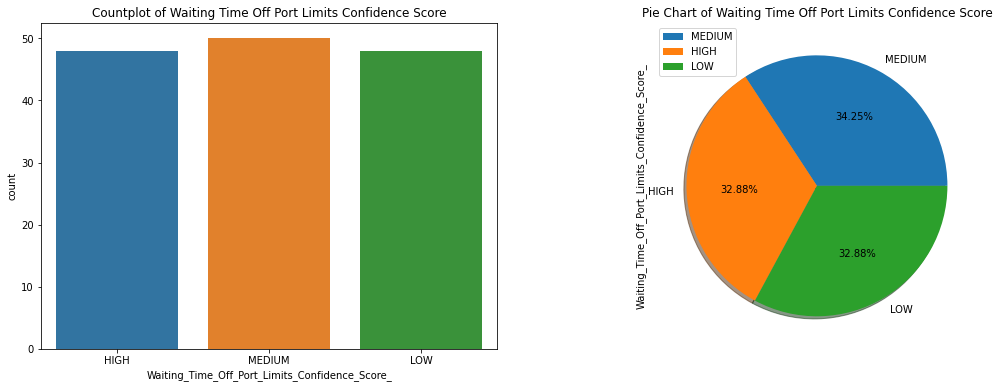

In [64]:
print("value_count\n",pc['Waiting_Time_Off_Port_Limits_Confidence_Score_'].value_counts())
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Countplot of Waiting Time Off Port Limits Confidence Score')
sns.countplot(pc['Waiting_Time_Off_Port_Limits_Confidence_Score_'])
plt.subplot(1,2,2)
plt.title('Pie Chart of Waiting Time Off Port Limits Confidence Score')
pc['Waiting_Time_Off_Port_Limits_Confidence_Score_'].value_counts().plot.pie(shadow=True, autopct='%1.2f%%')
plt.legend();

value_count
 MEDIUM    50
HIGH      48
LOW       48
Name: Time_At_Port_Confidence_Score, dtype: int64


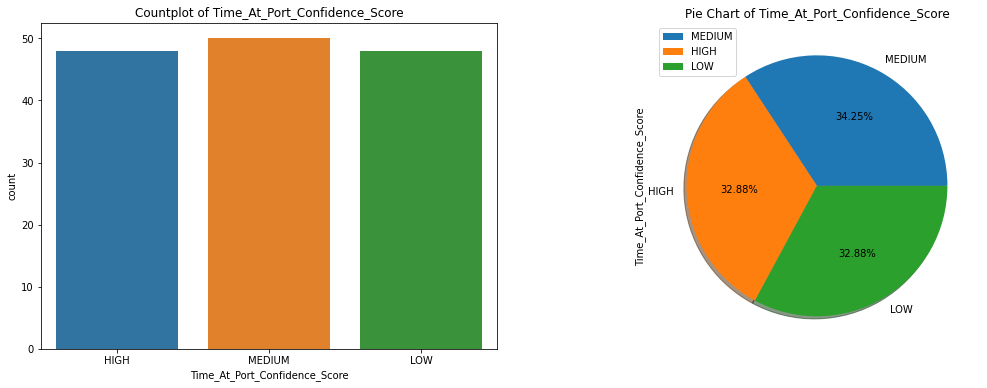

In [65]:
print("value_count\n",pc['Time_At_Port_Confidence_Score'].value_counts())
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Countplot of Time_At_Port_Confidence_Score')
sns.countplot(pc['Time_At_Port_Confidence_Score'])
plt.subplot(1,2,2)
plt.title('Pie Chart of Time_At_Port_Confidence_Score')
pc['Time_At_Port_Confidence_Score'].value_counts().plot.pie(shadow=True, autopct='%1.2f%%')
plt.legend();

Year                                                                AxesSubplot(0.125,0.867862;0.133621x0.0121383)
Week                                                             AxesSubplot(0.285345,0.867862;0.133621x0.0121383)
Median_Waiting_Time_Off_Port_Limits                               AxesSubplot(0.44569,0.867862;0.133621x0.0121383)
Median_Time_At_Port                                              AxesSubplot(0.606034,0.867862;0.133621x0.0121383)
Median_Waiting_Time_Off_Port_Limits__Standard_Deviation_         AxesSubplot(0.766379,0.867862;0.133621x0.0121383)
Time_At_Port_Standard_Deviation                                     AxesSubplot(0.125,0.853296;0.133621x0.0121383)
Median_Waiting_Time_Off_Port_Limits_Difference_(week-to-week)    AxesSubplot(0.285345,0.853296;0.133621x0.0121383)
Waiting_Time_Off_Port_Limits__%_Difference_(week-to-week)         AxesSubplot(0.44569,0.853296;0.133621x0.0121383)
Time_At_Port_Difference_(week-to-week)                           AxesSubplot(0.6

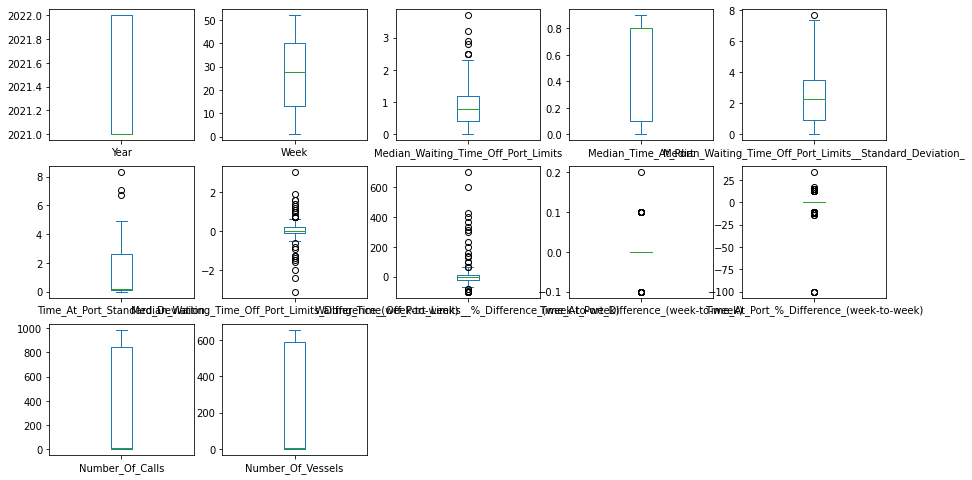

In [45]:
pc.plot(kind='box', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150))

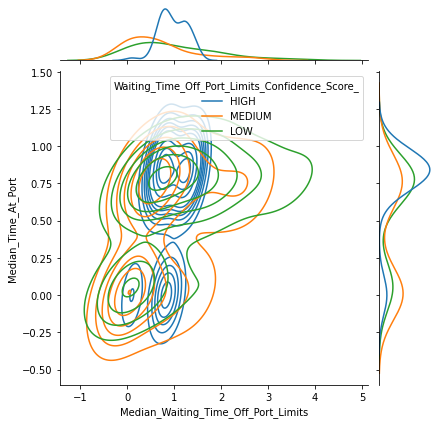

In [68]:
sns.jointplot(data=pc,x="Median_Waiting_Time_Off_Port_Limits", y="Median_Time_At_Port", hue="Waiting_Time_Off_Port_Limits_Confidence_Score_",kind="kde");

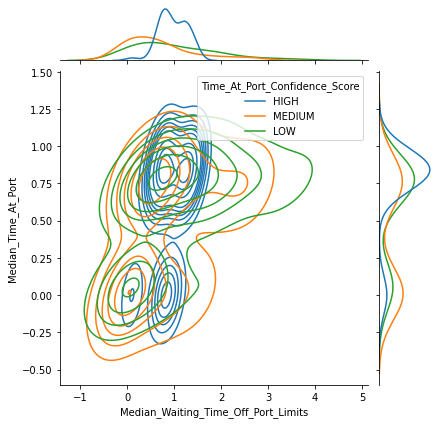

In [69]:
sns.jointplot(data=pc,x="Median_Waiting_Time_Off_Port_Limits", y="Median_Time_At_Port", hue="Time_At_Port_Confidence_Score",kind="kde");

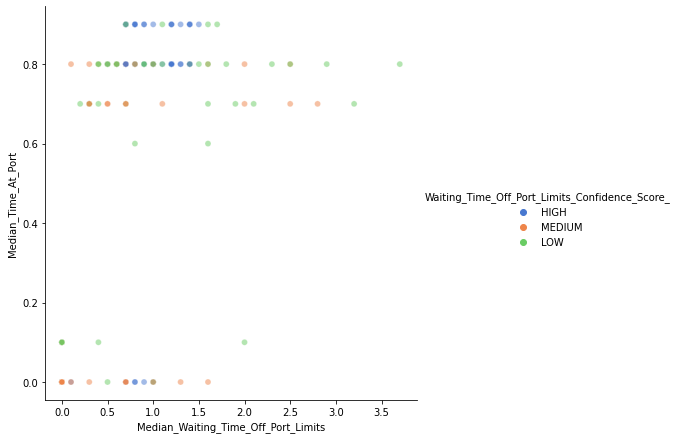

In [72]:
sns.relplot(x="Median_Waiting_Time_Off_Port_Limits", y="Median_Time_At_Port", hue="Waiting_Time_Off_Port_Limits_Confidence_Score_", 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=pc);

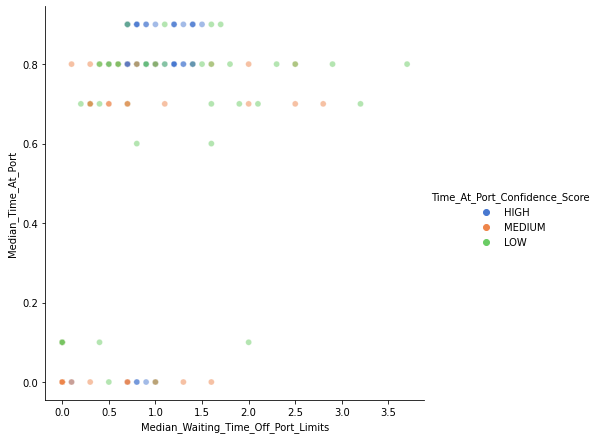

In [73]:
sns.relplot(x="Median_Waiting_Time_Off_Port_Limits", y="Median_Time_At_Port", hue="Time_At_Port_Confidence_Score", 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=pc);

Text(0.5, 1.0, 'Correlation heatmap for the Data')

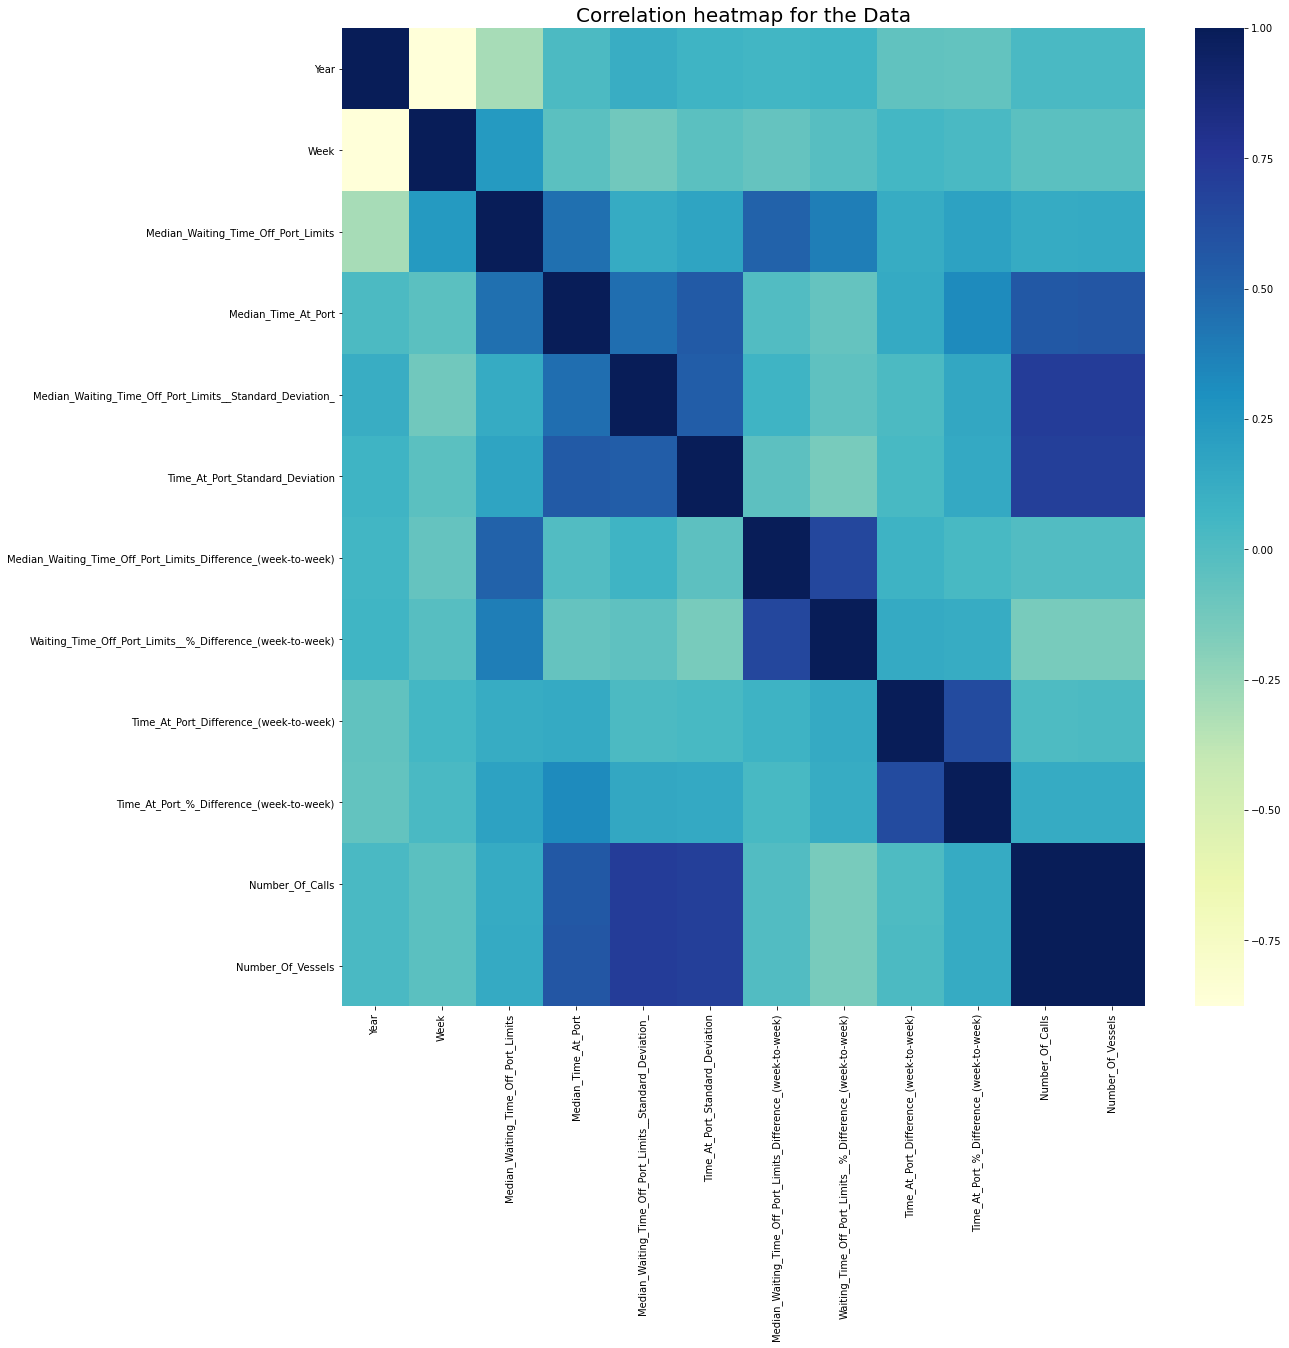

In [74]:
# heatmap to get correlation

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(pc.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)

In [75]:
pc.isna().apply(pd.value_counts) 

,Port,Year,Week,Median_Waiting_Time_Off_Port_Limits,Waiting_Time_Off_Port_Limits_Confidence_Score_,Median_Time_At_Port,Time_At_Port_Confidence_Score,Median_Waiting_Time_Off_Port_Limits__Standard_Deviation_,Time_At_Port_Standard_Deviation,Median_Waiting_Time_Off_Port_Limits_Difference_(week-to-week),Waiting_Time_Off_Port_Limits__%_Difference_(week-to-week),Time_At_Port_Difference_(week-to-week),Time_At_Port_%_Difference_(week-to-week),Number_Of_Calls,Number_Of_Vessels,Port_Country
False,146.0,146.0,146.0,141,146.0,146.0,146.0,122,146.0,127,129,137,137,146.0,146.0,146.0
True,NaN,NaN,NaN,5,NaN,NaN,NaN,24,NaN,19,17,9,9,NaN,NaN,NaN


In [76]:
#Replacing nan value with 0
pc = pc.replace(np.nan,0)

In [77]:
pc.isna().apply(pd.value_counts) 

,Port,Year,Week,Median_Waiting_Time_Off_Port_Limits,Waiting_Time_Off_Port_Limits_Confidence_Score_,Median_Time_At_Port,Time_At_Port_Confidence_Score,Median_Waiting_Time_Off_Port_Limits__Standard_Deviation_,Time_At_Port_Standard_Deviation,Median_Waiting_Time_Off_Port_Limits_Difference_(week-to-week),Waiting_Time_Off_Port_Limits__%_Difference_(week-to-week),Time_At_Port_Difference_(week-to-week),Time_At_Port_%_Difference_(week-to-week),Number_Of_Calls,Number_Of_Vessels,Port_Country
False,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146


In [78]:
# Segregate predictors vs target attributes.

drop_col=['Waiting_Time_Off_Port_Limits_Confidence_Score_','Time_At_Port_Confidence_Score','Port_Country']
feature_num=pc.drop(columns=drop_col,axis=1)
y=pd.DataFrame(pc['Waiting_Time_Off_Port_Limits_Confidence_Score_'])
print("feature_num:",feature_num.shape)
print('\ny:',y.shape)

feature_num: (146, 13)

y: (146, 1)


In [80]:
#Check for target balancing and fixing if found imbalanced
from imblearn.over_sampling import SMOTE
from sklearn import metrics 

print("\nBefore SMOTE target variable data:",y.value_counts())






Before SMOTE target variable data: Waiting_Time_Off_Port_Limits_Confidence_Score_
MEDIUM                                            50
HIGH                                              48
LOW                                               48
dtype: int64


In [ ]:
sm=SMOTE(k_neighbors=5 , random_state=1 , sampling_strategy='auto')
x_resample_smote, y_resample_smote=sm.fit_resample(feature_num,y)

print("\nAfter SMOTE target variable data:",y_resample_smote.value_counts())

print("\nBefore SMOTE x_resample_smote",feature_num.shape)
print("Before SMOTE y_resample_smote",y.shape)
print("\nAfter SMOTE x_resample_smote",x_resample_smote.shape)
print("After SMOTE y_resample_smote",y_resample_smote.shape)

In [ ]:
# Performing train-test split and standardising the data 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

#scale the data using the standard scaler

sd_scale=StandardScaler()

X_scaled=sd_scale.fit_transform(x_resample_smote)
print("\nX_scaled shape:",X_scaled.shape)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resample_smote, test_size = 0.25, random_state = 1)
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

In [30]:
#Checking the train and test data have similar statistical characteristics when compared with original data. [2 Marks]

X_scaled=pd.DataFrame(X_scaled)
X_test=pd.DataFrame(X_test)
sig.describe()
df_combine = pd.concat([X_scaled, X_test], axis=0, ignore_index=True)
df_combine.describe()

,0,1,2,3,4,5
count,19910.000000,19910.000000,19910.000000,19910.000000,19910.000000,19910.000000
mean,0.006284,0.003648,-0.000097,-0.001251,0.002985,-0.003381
std,1.001310,0.997913,0.998181,0.995979,0.995586,0.999249
min,-6.408940,-1.932211,-1.341852,-1.411752,-10.235367,-2.196198
25%,-0.795254,0.444247,-1.341852,-0.450715,0.219499,-0.822272
50%,0.017253,0.510595,0.248622,0.062313,0.219499,-0.099671
75%,0.829761,0.576942,0.834586,0.517133,0.219499,0.803430
max,2.208561,0.745828,1.671677,4.995162,0.219499,2.738674


Training Accuracy : 73.99129415704002

Test Accuracy : 73.80713209442492

Result:
                  Model  train_accuracy  test_accuracy
0  Logistic Regression        0.739913       0.738071

classification Matrix:
               precision    recall  f1-score   support

       False       0.74      0.70      0.72      1924
        True       0.73      0.78      0.75      2058

    accuracy                           0.74      3982
   macro avg       0.74      0.74      0.74      3982
weighted avg       0.74      0.74      0.74      3982



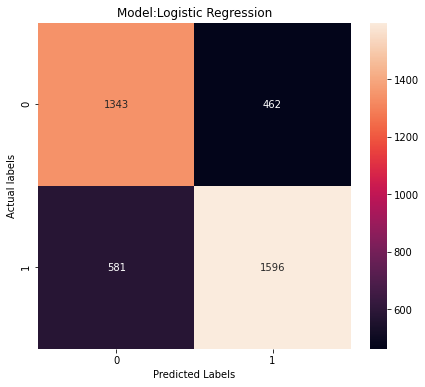

In [31]:
# Supervised Learning technique 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

model=LogisticRegression(random_state=1)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

test_acc=model.score(X_test, y_test)
train_acc=model.score(X_train, y_train)
print('Training Accuracy :',train_acc*100 )
print('\nTest Accuracy :',test_acc*100)

result = pd.DataFrame({'Model' : ['Logistic Regression'], 'train_accuracy' : [train_acc],'test_accuracy' : [test_acc]})

print("\nResult:\n",result)

plt.figure(figsize=(7,6))
plt.title('Model:Logistic Regression')
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual labels')

print('\nclassification Matrix:\n', classification_report(y_test,y_pred))

In [32]:
# KFold cross validation with Upsampling as we have more accuracy there
# we will use the original dataset or SMOTE dataset as kfold it will automatically divide in training and testing dataset.

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

num_folds = 10
seed = 8

kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)

lgr_kfold=LogisticRegression(random_state=1)
results = cross_val_score(lgr_kfold, x_resample_smote, y_resample_smote, cv=kfold)
print(results)
print("CV Accuracy - Logistic Regression: %.4f (%.4f)" % (results.mean(), results.std()))

result.loc[1]=['Logistic Regression_kfold','',results.mean()]

print("\nResult:\n",result)



[0.68424357 0.69428751 0.73446328 0.74199623 0.68110483 0.68110483
 0.6873823  0.67419962 0.68027638 0.68153266]
CV Accuracy - Logistic Regression: 0.6941 (0.0227)

Result:
                        Model train_accuracy  test_accuracy
0        Logistic Regression       0.739913       0.738071
1  Logistic Regression_kfold                      0.694059


In [33]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import LeaveOneOut
start = time.time()
lgr_LOOCV=LogisticRegression(random_state=1)
scores = cross_val_score(lgr_LOOCV, x_resample_smote, y_resample_smote, cv=LeaveOneOut())
print(scores)

print("\scores:\n",scores)

print("LOOCV Accuracy - Logistic Regression: %.4f (%.4f)" % (scores.mean(), scores.std()))

result.loc[2]=['Logistic Regression LOOCV','',scores.mean()]

print("\nResult:\n",result)
end = time.time()
print("Execution time: {0:.5} seconds \n".format(end-start))


[1. 1. 1. ... 1. 1. 1.]
\scores:
 [1. 1. 1. ... 1. 1. 1.]
LOOCV Accuracy - Logistic Regression: 0.7058 (0.4557)

Result:
                        Model train_accuracy  test_accuracy
0        Logistic Regression       0.739913       0.738071
1  Logistic Regression_kfold                      0.694059
2  Logistic Regression LOOCV                      0.705801
Execution time: 823.22 seconds 



In [28]:
k = 10
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k, random_state = 1,shuffle=True)
lgr_stratified=LogisticRegression(random_state=1)
results = cross_val_score(lgr_stratified, x_resample_smote, y_resample_smote, cv = stratified_kfold)
print(results)

print("\results:\n",results)

print("lgr_stratified Accuracy - Logistic Regression: %.4f (%.4f)" % (results.mean(), results.std()))

result.loc[3]=['Logistic_Regression_stratifiedKfold','',results.mean()]

print("\nResult:\n",result)


[0.68600683 0.73037543 0.66552901 0.70648464 0.70648464 0.71672355
 0.74315068 0.69520548 0.70890411 0.68150685]
esults:
 [0.68600683 0.73037543 0.66552901 0.70648464 0.70648464 0.71672355
 0.74315068 0.69520548 0.70890411 0.68150685]
lgr_stratified Accuracy - Logistic Regression: 0.7040 (0.0219)

Result:
                                  Model train_accuracy  test_accuracy
0                  Logistic Regression        0.95351       0.931694
1            Logistic Regression_kfold                      0.702990
2            Logistic Regression LOOCV                      0.706767
3  Logistic_Regression_stratifiedKfold                      0.704037


In [72]:
#Parameter Tuning Using GridDSearch

#Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(random_state=1)
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,cv = 10)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred = grid_clf_acc.predict(X_test)
train_acc=grid_clf_acc.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(test_acc))

#Logistic Regression (Grid Search) Confusion matrix


print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_pred))

result.loc[4]=['Logistic_Regression_GridSearch', train_acc,test_acc]

print("\nResult:\n",result)
print("\nbest_params_",grid_clf_acc.best_params_)

print("new model\n")
clf2= LogisticRegression(C=1, penalty='l2')

clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test)

test_acc=clf2.score(X_test, y_test)
train_acc=clf2.score(X_train, y_train)
print('Training Accuracy :',clf2.score(X_train, y_train) )
print('\nTest Accuracy :',test_acc)

Accuracy Score : 0.7365645404319437

confusion_matrix:
 [[1332  592]
 [ 457 1601]]

Result:
                             Model train_accuracy  test_accuracy
0             Logistic Regression       0.739913       0.738071
1       Logistic Regression_kfold                      0.694059
2       Logistic Regression LOOCV                      0.705801
4  Logistic_Regression_GridSearch       0.739662       0.736565

best_params_ {'C': 0.001, 'penalty': 'l2'}
new model

Training Accuracy : 0.7399129415704001

Test Accuracy : 0.7380713209442491


In [73]:
# RandomizedSearch for tuning (possibly faster than GridSearch)
from sklearn.model_selection import RandomizedSearchCV
clf_rand = LogisticRegression(random_state=1)
rand_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25],"fit_intercept" :  [True, False],"warm_start" : [True,False],"random_state" : [1]}
rand_clf_acc = RandomizedSearchCV(clf_rand, param_distributions = rand_values,cv = 10)
rand_clf_acc.fit(X_train, y_train)


#Predict values based on new parameters
y_pred_rand = rand_clf_acc.predict(X_test)
train_accu_rand=rand_clf_acc.score(X_train,y_train)
test_accu_rand=accuracy_score(y_test,y_pred_rand)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(test_accu_rand))

#Logistic Regression (Grid Search) Confusion matrix


print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_pred_rand))

result.loc[5]=['Logistic_Regression_RandomizedSearchCV',train_accu_rand,test_accu_rand]

print("\nResult:\n",result)
print("\nbest_params_",rand_clf_acc.best_params_)


Accuracy Score : 0.7443495730788549

confusion_matrix:
 [[1309  615]
 [ 403 1655]]

Result:
                                     Model train_accuracy  test_accuracy
0                     Logistic Regression       0.739913       0.738071
1               Logistic Regression_kfold                      0.694059
2               Logistic Regression LOOCV                      0.705801
4          Logistic_Regression_GridSearch       0.739662       0.736565
5  Logistic_Regression_RandomizedSearchCV       0.744768       0.744350

best_params_ {'warm_start': False, 'random_state': 1, 'penalty': 'l2', 'fit_intercept': False, 'C': 0.009}


In [74]:
# Checking for target balancing 

from imblearn.over_sampling import SMOTE
from sklearn import metrics 

print("\nBefore SMOTE target variable data:",y.value_counts())

sm=SMOTE(k_neighbors=5 , random_state=1 , sampling_strategy='auto')
x_resample_smote, y_resample_smote=sm.fit_resample(feature_num,y)

print("\nAfter SMOTE target variable data:",y_resample_smote.value_counts())

print("\nBefore SMOTE x_resample_smote",feature_num.shape)
print("Before SMOTE y_resample_smote",y.shape)
print("\nAfter SMOTE x_resample_smote",x_resample_smote.shape)
print("After SMOTE y_resample_smote",y_resample_smote.shape)

# Perform train-test split and standardise the data or vice versa if required. [3 Marks]
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

#scale the data using the standard scaler

sd_scale=StandardScaler()

X_scaled=sd_scale.fit_transform(x_resample_smote)
print("\nX_scaled shape:",X_scaled.shape)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resample_smote, test_size = 0.25, random_state = 1)
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)



Before SMOTE target variable data: Lightning
False        7964
True          628
dtype: int64

After SMOTE target variable data: Lightning
False        7964
True         7964
dtype: int64

Before SMOTE x_resample_smote (8592, 6)
Before SMOTE y_resample_smote (8592, 1)

After SMOTE x_resample_smote (15928, 6)
After SMOTE y_resample_smote (15928, 1)

X_scaled shape: (15928, 6)
shape of X_train:  (11946, 6)
shape of X_test:  (3982, 6)
shape of y_train:  (11946, 1)
shape of y_test:  (3982, 1)


In [76]:
#Applying  PCA(principal component analysis) on 6 components and transforming the scaled data
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_train=pd.DataFrame(pca.fit_transform(X_train))
X_test=pd.DataFrame(pca.fit_transform(X_test))
print("\n")
print("\ncomponents_\n:",pca.components_)
print("\ncomponents taken to expalin the model:",pca.n_components)
print("\n")
print("explained_variance_ratio_:\n",pca.explained_variance_ratio_)

print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)




components_
: [[-0.3767815   0.19671926 -0.62137085 -0.58773368 -0.13502928  0.2637645 ]
 [-0.55083279 -0.20062742  0.24889735  0.30635073 -0.6383906   0.30494041]
 [ 0.29972428  0.84754776  0.07044487  0.13470228 -0.40723619  0.05366244]
 [-0.1870215  -0.01544198  0.01885118 -0.22161357 -0.35680194 -0.88769868]
 [ 0.64970338 -0.4498063  -0.26935214 -0.11346069 -0.52814347  0.10583189]
 [-0.08770847  0.01219886 -0.68853464  0.69324436  0.04626095 -0.18801768]]

components taken to expalin the model: 6


explained_variance_ratio_:
 [0.31603378 0.18330218 0.17077616 0.15999357 0.11922644 0.05066788]
shape of X_train:  (11946, 6)
shape of X_test:  (3982, 6)
shape of y_train:  (11946, 1)
shape of y_test:  (3982, 1)



sum of Components with 90% or above variance explained: 100.0


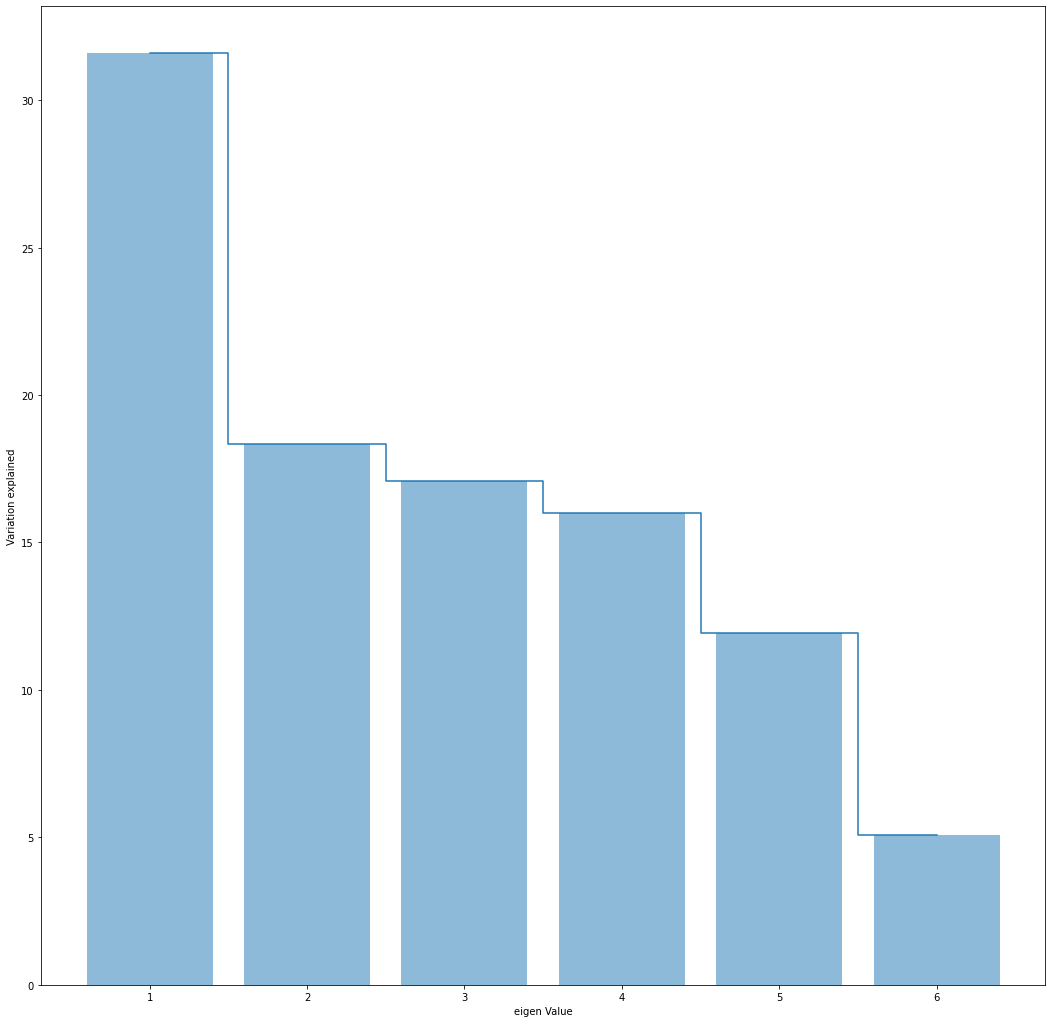

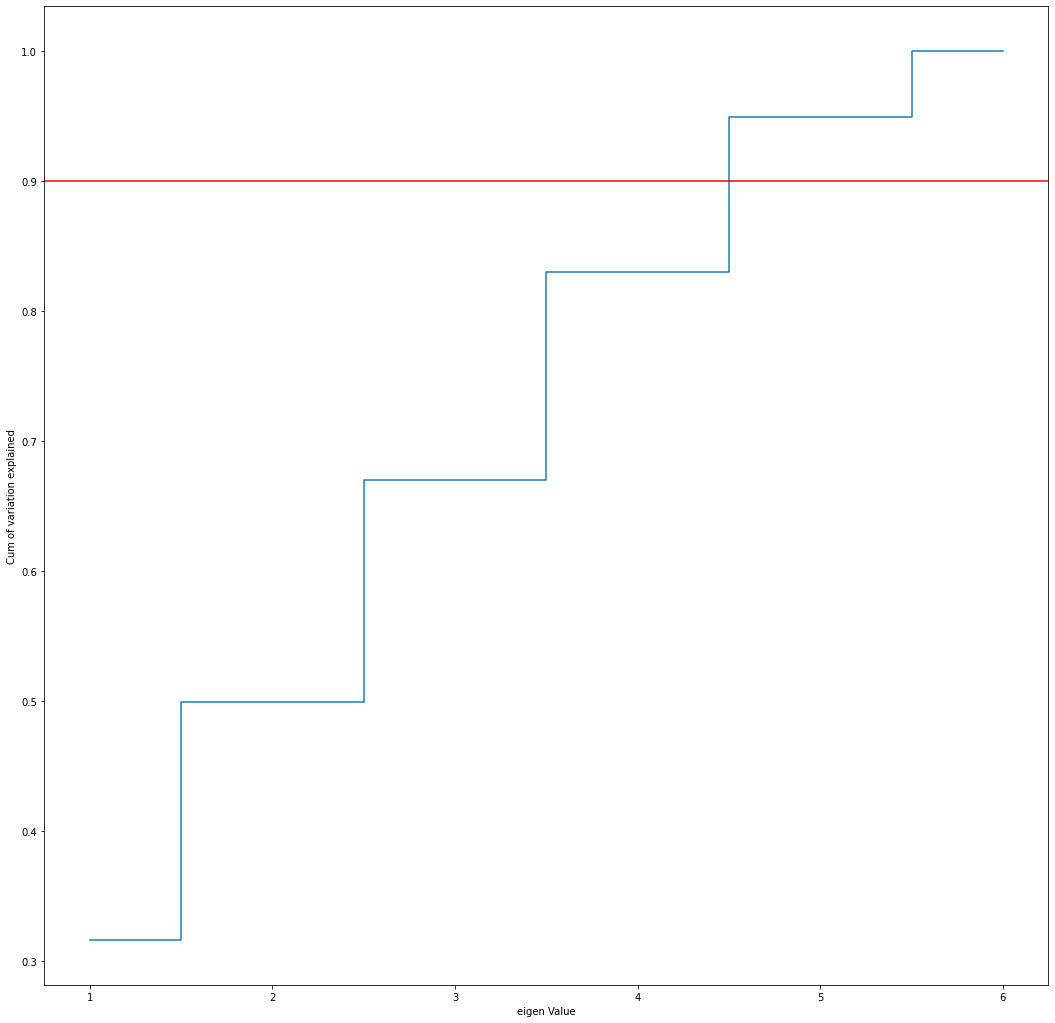

In [90]:
# Visualize Cumulative Variance Explained with Number of Components.
print("\nsum of Components with 90% or above variance explained:",np.sum((pca.explained_variance_ratio_)*100))

plt.bar(list(range(1,7)),(pca.explained_variance_ratio_)*100,alpha=0.5)
plt.step(list(range(1,7)),(pca.explained_variance_ratio_)*100, where='mid')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

# Draw a horizontal line on the above plot to highlight the threshold of 90%. 

plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [91]:
# RandomizedSearch for tuning (possibly faster than GridSearch)
from sklearn.model_selection import RandomizedSearchCV
clf_rand_after_pca = LogisticRegression(random_state=1)
rand_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25],"fit_intercept" :  [True, False],"warm_start" : [True,False],"random_state" : [1]}
rand_clf_acc = RandomizedSearchCV(clf_rand_after_pca, param_distributions = rand_values,cv = 10)
rand_clf_acc.fit(X_train, y_train)


#Predict values based on new parameters
y_pred_rand = rand_clf_acc.predict(X_test)

test_accu_rand_after_pca=accuracy_score(y_test,y_pred_rand)
train_accu_rand_after_pca=rand_clf_acc.score(X_train,y_train)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(test_accu_rand_after_pca))

#Logistic Regression (Grid Search) Confusion matrix


print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_pred_rand))

result.loc[6]=['LR_RandomizedSearch_After_PCA',train_accu_rand_after_pca,test_accu_rand_after_pca]

print("\nResult:\n",result)
print("\nbest_params_",rand_clf_acc.best_params_)


Accuracy Score : 0.7305374183827222

confusion_matrix:
 [[1311  613]
 [ 460 1598]]

Result:
                                     Model train_accuracy  test_accuracy
0                     Logistic Regression       0.739913       0.738071
1               Logistic Regression_kfold                      0.694059
2               Logistic Regression LOOCV                      0.705801
4          Logistic_Regression_GridSearch       0.739662       0.736565
5  Logistic_Regression_RandomizedSearchCV       0.744768       0.744350
6           LR_RandomizedSearch_After_PCA       0.744768       0.730537

best_params_ {'warm_start': False, 'random_state': 1, 'penalty': 'l2', 'fit_intercept': False, 'C': 0.01}


In [92]:
#Parameter Tuning Using GridDSearch

#Grid Search
from sklearn.model_selection import GridSearchCV
clf_after_pca = LogisticRegression(random_state=1)
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf_after_pca, param_grid = grid_values,cv = 10)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

accu_after_pca=accuracy_score(y_test,y_pred_acc)
train_accu_after_pca=grid_clf_acc.score(X_train,y_train)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accu_after_pca))

#Logistic Regression (Grid Search) Confusion matrix


print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_pred_acc))

result.loc[7]=['LR_GridSearch_after_PCA',train_accu_after_pca,accu_after_pca]

print("\nResult:\n",result)
print("\nbest_params_",grid_clf_acc.best_params_)

Accuracy Score : 0.7307885484681065

confusion_matrix:
 [[1342  582]
 [ 490 1568]]

Result:
                                     Model train_accuracy  test_accuracy
0                     Logistic Regression       0.739913       0.738071
1               Logistic Regression_kfold                      0.694059
2               Logistic Regression LOOCV                      0.705801
4          Logistic_Regression_GridSearch       0.739662       0.736565
5  Logistic_Regression_RandomizedSearchCV       0.744768       0.744350
6           LR_RandomizedSearch_After_PCA       0.744768       0.730537
7                 LR_GridSearch_after_PCA       0.739662       0.730789

best_params_ {'C': 0.001, 'penalty': 'l2'}


Training Accuracy : 0.8874202370100274

Test Accuracy : 0.5683060109289617

Result:
                                     Model train_accuracy  test_accuracy
0                     Logistic Regression        0.95351       0.931694
1               Logistic Regression_kfold                      0.702990
2               Logistic Regression LOOCV                      0.706767
3     Logistic_Regression_stratifiedKfold                      0.704037
4          Logistic_Regression_GridSearch        0.95351       0.931694
5  Logistic_Regression_RandomizedSearchCV        0.95351       0.931694
6           LR_RandomizedSearch_After_PCA        0.88742       0.568306
7                 LR_GridSearch_after_PCA       0.886964       0.572404
8                 Logistic_Regression_PCA        0.88742       0.568306

classification Matrix:
               precision    recall  f1-score   support

           0       0.57      0.61      0.59       370
           1       0.57      0.52      0.54       362

    ac

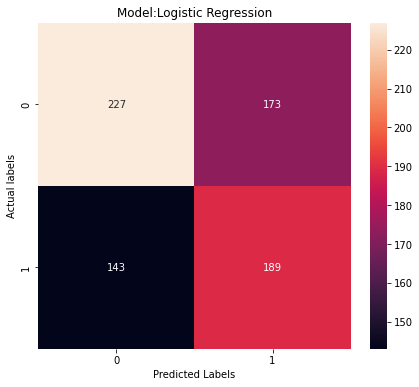

In [36]:

# Using Supervised Learning technique to train a model on PCA data.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

model_pca=LogisticRegression(random_state=1,C= 10, penalty= 'l2')
model_pca.fit(X_train ,y_train)

y_pred=model_pca.predict(X_test)

test_acc_pca=model_pca.score(X_test, y_test)
train_acc_pca=model_pca.score(X_train, y_train)
print('Training Accuracy :',model_pca.score(X_train, y_train) )
print('\nTest Accuracy :',test_acc_pca)

result.loc[8]=['Logistic_Regression_PCA',train_acc_pca,test_acc_pca]

print("\nResult:\n",result)

plt.figure(figsize=(7,6))
plt.title('Model:Logistic Regression')
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual labels')

print('\nclassification Matrix:\n', classification_report(y_test,y_pred))

In [138]:
# XGBClassifier on Normal without hypertunning

feature_num=sig.drop(columns=drop_col,axis=1)
y=pd.DataFrame(sig['Lightning'])
print("feature_num:",feature_num.shape)
print('\ny:',y.shape)

#Perform train-test split and standardise the data.

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

#scale the data using the standard scaler

sd_scale=StandardScaler()

X_scaled=sd_scale.fit_transform(feature_num)
print("\nX_scaled shape:\n",X_scaled.shape)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 1)
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)



feature_num: (8592, 6)

y: (8592, 1)

X_scaled shape:
 (8592, 6)
shape of X_train:  (6444, 6)
shape of X_test:  (2148, 6)
shape of y_train:  (6444, 1)
shape of y_test:  (2148, 1)


[13:15:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 0.9927172275238574

Test Accuracy : 0.9806629834254144

Result:
                        Model train_accuracy  test_accuracy
0        Logistic Regression       0.739913       0.738071
1  Logistic Regression_kfold                      0.694059
2  Logistic Regression LOOCV                      0.705801
9                   xgb_base       0.992717       0.980663


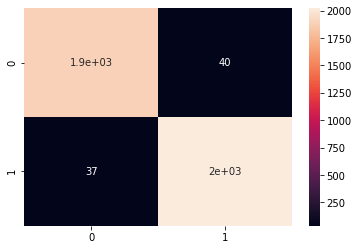

In [38]:
xgb_base_model = XGBClassifier(random_state=1)
xgb_base_model.fit(X_train, y_train)
y_pred = xgb_base_model.predict(X_test)
xgb_test=xgb_base_model.score(X_test, y_test)
xgb_train=xgb_base_model.score(X_train, y_train)
print('Training Accuracy :',xgb_train)
print('\nTest Accuracy :',xgb_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

result.loc[9]=['xgb_base',xgb_train,xgb_test]

print("\nResult:\n",result)


Training Accuracy : 0.9968190189184665

Test Accuracy : 0.9766449020592667

Result:
                         Model train_accuracy  test_accuracy
0         Logistic Regression       0.739913       0.738071
1   Logistic Regression_kfold                      0.694059
2   Logistic Regression LOOCV                      0.705801
9                    xgb_base       0.992717       0.980663
10                    rf_base       0.996819       0.976645


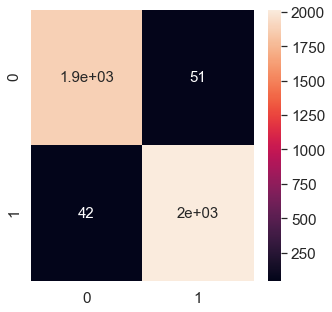

In [42]:
# Base RandomForestClassifier model(Normal Data)

rf_base_model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
rf_base_model.fit(X_train, y_train)
y_pred = rf_base_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

rf_test=rf_base_model.score(X_test, y_test)
rf_train=rf_base_model.score(X_train, y_train)
print('Training Accuracy :',rf_train)
print('\nTest Accuracy :',rf_test)

result.loc[10]=['rf_base',rf_train,rf_test]

print("\nResult:\n",result)

test Accuracy:  0.11795030324608125
train Accuracy:  0.11275575284778117

Result:
                                      Model train_accuracy  test_accuracy
0                      Logistic Regression       0.739913       0.738071
1                Logistic Regression_kfold                      0.694059
2                Logistic Regression LOOCV                      0.705801
4           Logistic_Regression_GridSearch       0.739662       0.736565
5   Logistic_Regression_RandomizedSearchCV       0.744768       0.744350
6            LR_RandomizedSearch_After_PCA       0.744768       0.730537
7                  LR_GridSearch_after_PCA       0.739662       0.730789
10                                 rf_base       0.996819       0.801105
11                              lasso_base           0.11       0.120000


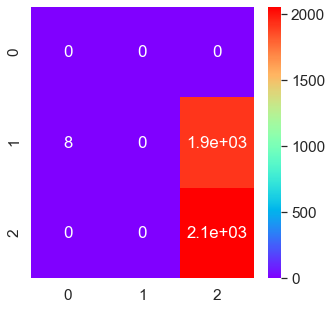

In [95]:
# Lasso Model on normal data

lasso_base = Lasso(alpha=0.1,random_state=1)
lasso_base.fit(X_train,y_train)
#print ("Lasso model:", (lasso.coef_))

y_pred = lasso_base.predict(X_test)

#Convert the sign of the predicted values as the classifier
y_pred2 = np.sign(y_pred)

lss_test=lasso_base.score(X_test,y_test)
lss_train=lasso_base.score(X_train,y_train)
lss_train=lss_train.round(2)
lss_test=lss_test.round(2)

print("test Accuracy: ", lasso_base.score(X_test,y_test))
print("train Accuracy: ", lasso_base.score(X_train,y_train))

cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

result.loc[11]=['lasso_base',lss_train,lss_test]

print("\nResult:\n",result)

Training Accuracy : 0.6973045370835426

Test Accuracy : 0.6823204419889503

Result:
                                      Model train_accuracy  test_accuracy
0                      Logistic Regression       0.739913       0.738071
1                Logistic Regression_kfold                      0.694059
2                Logistic Regression LOOCV                      0.705801
4           Logistic_Regression_GridSearch       0.739662       0.736565
5   Logistic_Regression_RandomizedSearchCV       0.744768       0.744350
6            LR_RandomizedSearch_After_PCA       0.744768       0.730537
7                  LR_GridSearch_after_PCA       0.739662       0.730789
10                                 rf_base       0.996819       0.801105
11                              lasso_base           0.11       0.120000
12                        naive_bayes_base       0.697305       0.682320


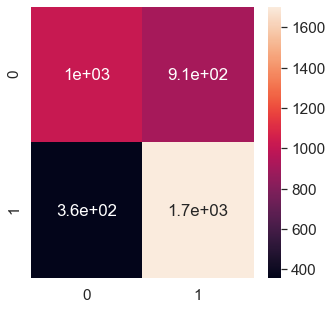

In [96]:
# Naive Bayes base model
naive_bayes_base=GaussianNB()

naive_bayes_base.fit(X_train, y_train)
y_pred = naive_bayes_base.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

nb_test=naive_bayes_base.score(X_test, y_test)
nb_train=naive_bayes_base.score(X_train, y_train)
print('Training Accuracy :',nb_train)
print('\nTest Accuracy :',nb_test)

result.loc[12]=['naive_bayes_base',nb_train,nb_test]

print("\nResult:\n",result)



Training Accuracy : 0.8202745688933534

Test Accuracy : 0.8071320944249121

Result:
                                      Model train_accuracy  test_accuracy
0                      Logistic Regression       0.739913       0.738071
1                Logistic Regression_kfold                      0.694059
2                Logistic Regression LOOCV                      0.705801
4           Logistic_Regression_GridSearch       0.739662       0.736565
5   Logistic_Regression_RandomizedSearchCV       0.744768       0.744350
6            LR_RandomizedSearch_After_PCA       0.744768       0.730537
7                  LR_GridSearch_after_PCA       0.739662       0.730789
10                                 rf_base       0.996819       0.801105
11                              lasso_base           0.11       0.120000
12                        naive_bayes_base       0.697305       0.682320
13                                svm_base       0.820275       0.807132


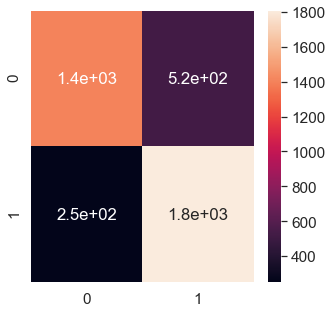

In [97]:
# base SVM model
svm_base=SVC(random_state=1)

svm_base.fit(X_train, y_train)
y_pred = svm_base.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True)

svm_test=svm_base.score(X_test, y_test)
svm_train=svm_base.score(X_train, y_train)
print('Training Accuracy :',svm_train)
print('\nTest Accuracy :',svm_test)

result.loc[13]=['svm_base',svm_train,svm_test]

print("\nResult:\n",result)



In [47]:
# XGBClassifier model on SMOTE data (SMOTE done on scaled data)
#----------------------------------------------------
xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
xgb_test=xgb_model.score(X_test, y_test)
xgb_train=xgb_model.score(X_train, y_train)
print('Training Accuracy :',xgb_train)
print('\nTest Accuracy :',xgb_test)

result.loc[13]=['xgb_smote',xgb_train,xgb_test]

print("\nResult:\n",result)

#---------------------------------
# RandomForestClassifier model(SMOTE Data)
#---------------------------------------------

rf_model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

rf_test=rf_model.score(X_test, y_test)
rf_train=rf_model.score(X_train, y_train)
print('Training Accuracy :',rf_train)
print('\nTest Accuracy :',rf_test)

result.loc[14]=['rf_smote',rf_train,rf_test]

print("\nResult:\n",result)

#-------------------------------
# Lasso Model on Smote data
#-----------------------------

lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(X_train,y_train)
#print ("Lasso model:", (lasso.coef_))
y_pred = lasso.predict(X_test)

#Convert the sign of the predicted values as the classifier
y_pred2 = np.sign(y_pred)
lss_test=lasso.score(X_test,y_test)
lss_train=lasso.score(X_train,y_train)

print("test Accuracy: ", lasso.score(X_test,y_test)*100)
print("train Accuracy: ", lasso.score(X_train,y_train)*100)

result.loc[15]=['lasso_smote',lss_train,lss_test]

print("\nResult:\n",result)

#----------------------------
# Naive Bayes on smote data
#----------------------------

naive_bayes=GaussianNB()

naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

nb_test=naive_bayes.score(X_test, y_test)
nb_train=naive_bayes.score(X_train, y_train)
print('Training Accuracy :',nb_train)
print('\nTest Accuracy :',nb_test)

result.loc[16]=['naive_smote',nb_train,nb_test]

print("\nResult:\n",result)

#--------------------
# SVM model on smote data
#------------------
svm_base=SVC(random_state=1)

svm_base.fit(X_train, y_train)
y_pred = svm_base.predict(X_test)

svm_test=svm_base.score(X_test, y_test)
svm_train=svm_base.score(X_train, y_train)
print('Training Accuracy :',svm_train)
print('\nTest Accuracy :',svm_test)

result.loc[17]=['svm_smote',svm_train,svm_test]

print("\nResult:\n",result)

[13:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 0.9927172275238574

Test Accuracy : 0.9806629834254144

Result:
                         Model train_accuracy  test_accuracy
0         Logistic Regression       0.739913       0.738071
1   Logistic Regression_kfold                      0.694059
2   Logistic Regression LOOCV                      0.705801
9                    xgb_base       0.992717       0.980663
10                    rf_base       0.996819       0.976645
13                  xgb_smote       0.992717       0.980663
Training Accuracy : 0.9968190189184665

Test Accuracy : 0.9766449020592667

Result:
                         Model train_accuracy  test_accuracy
0         Logistic Regression       0.73

In [101]:
#Applying PCA(principal component analysis) on 6 components and transform the scaled data
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_train=pd.DataFrame(pca.fit_transform(X_train))
X_test=pd.DataFrame(pca.fit_transform(X_test))
print("\n")
print("\ncomponents_\n:",pca.components_)
print("\ncomponents taken to expalin the model:",pca.n_components)
print("\n")
print("explained_variance_ratio_:\n",pca.explained_variance_ratio_)

print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

print("\nsum of Components with 90% or above variance explained:",np.sum((pca.explained_variance_ratio_)*100))




components_
: [[ 1.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  1.00000000e+00  2.66453526e-15 -4.35415592e-16
   7.77156117e-16 -3.92047506e-16]
 [-0.00000000e+00 -2.10942375e-15  1.00000000e+00 -4.66640615e-16
   1.76247905e-15 -2.25514052e-16]
 [ 0.00000000e+00  3.15719673e-16  1.01481323e-16  1.00000000e+00
   1.88495053e-14  1.98598733e-16]
 [-0.00000000e+00 -6.66133815e-16 -1.60982339e-15 -1.90064978e-14
   1.00000000e+00 -3.80771803e-16]
 [-0.00000000e+00  2.56739074e-16  1.87350135e-16 -4.54904127e-16
   2.57606436e-16  1.00000000e+00]]

components taken to expalin the model: 6


explained_variance_ratio_:
 [0.31603378 0.18330218 0.17077616 0.15999357 0.11922644 0.05066788]
shape of X_train:  (11946, 6)
shape of X_test:  (3982, 6)
shape of y_train:  (11946, 1)
shape of y_test:  (3982, 1)

sum of Components with 90% or above variance explained: 100.0


In [52]:
# XGBClassifier model on PCA data (
#----------------------------------------------------
xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
xgb_test=xgb_model.score(X_test, y_test)
xgb_train=xgb_model.score(X_train, y_train)
print('Training Accuracy :',xgb_train)
print('\nTest Accuracy :',xgb_test)

result.loc[18]=['xgb_PCA',xgb_train,xgb_test]

print("\nResult:\n",result)

#---------------------------------
# RandomForestClassifier model(PCA Data)
#---------------------------------------------

rf_model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

rf_test=rf_model.score(X_test, y_test)
rf_train=rf_model.score(X_train, y_train)
print('Training Accuracy :',rf_train)
print('\nTest Accuracy :',rf_test)

result.loc[19]=['rf_PCA',rf_train,rf_test]

print("\nResult:\n",result)

#-------------------------------
# Lasso Model on PCA data
#-----------------------------

lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(X_train,y_train)
#print ("Lasso model:", (lasso.coef_))
y_pred = lasso.predict(X_test)

#Convert the sign of the predicted values as the classifier
y_pred2 = np.sign(y_pred)
lss_test=lasso.score(X_test,y_test)
lss_train=lasso.score(X_train,y_train)

print("test Accuracy: ", lasso.score(X_test,y_test)*100)
print("train Accuracy: ", lasso.score(X_train,y_train)*100)

result.loc[20]=['lasso_PCA',lss_train,lss_test]

print("\nResult:\n",result)

#----------------------------
# Naive Bayes on PCA data
#----------------------------

naive_bayes=GaussianNB()

naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

nb_test=naive_bayes.score(X_test, y_test)
nb_train=naive_bayes.score(X_train, y_train)
print('Training Accuracy :',nb_train)
print('\nTest Accuracy :',nb_test)

result.loc[21]=['naive_PCA',nb_train,nb_test]

print("\nResult:\n",result)

#--------------------
# SVM model on PCA data
#------------------
svm_base=SVC(random_state=1)

svm_base.fit(X_train, y_train)
y_pred = svm_base.predict(X_test)

svm_test=svm_base.score(X_test, y_test)
svm_train=svm_base.score(X_train, y_train)
print('Training Accuracy :',svm_train)
print('\nTest Accuracy :',svm_test)

result.loc[22]=['svm_PCA',svm_train,svm_test]

print("\nResult:\n",result)

[13:23:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 0.9927172275238574

Test Accuracy : 0.9806629834254144

Result:
                         Model train_accuracy  test_accuracy
0         Logistic Regression       0.739913       0.738071
1   Logistic Regression_kfold                      0.694059
2   Logistic Regression LOOCV                      0.705801
9                    xgb_base       0.992717       0.980663
10                    rf_base       0.996819       0.976645
13                  xgb_smote       0.992717       0.980663
14                   rf_smote       0.996819       0.976645
15                lasso_smote       0.168574       0.165889
16                naive_smote       0.676796       0.682823
17   

In [103]:
#Try using KFold cross validation with Upsampling
#we will use the original dataset or SMOTE dataset as kfold it will automatically divide in training and testing dataset.

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

num_folds = 10
seed = 8

kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)

xgb_kfold=XGBClassifier(random_state=1)
results = cross_val_score(xgb_kfold, x_resample_smote, y_resample_smote, cv=kfold)
print(results)
print("CV Accuracy - xgb: %.4f (%.4f)" % (results.mean(), results.std()))

result.loc[23]=['xgb_kfold','',results.mean()]

print("\nResult:\n",result)

rf_kfold=RandomForestClassifier(random_state=1)
results = cross_val_score(rf_kfold, x_resample_smote, y_resample_smote, cv=kfold)
print(results)
print("CV Accuracy - RF: %.4f (%.4f)" % (results.mean(), results.std()))

result.loc[24]=['rf_kfold','',results.mean()]

print("\nResult:\n",result)

lasso_kfold=Lasso(alpha=0.1,random_state=1)
results = cross_val_score(lasso_kfold, x_resample_smote, y_resample_smote, cv=kfold)
print(results)
print("CV Accuracy - lasso: %.4f (%.4f)" % (results.mean(), results.std()))

result.loc[25]=['lasso_kfold','',results.mean()]

print("\nResult:\n",result)

naive_bayes_kfold=GaussianNB()

results = cross_val_score(naive_bayes_kfold, x_resample_smote, y_resample_smote, cv=kfold)
print(results)
print("CV Accuracy - nb: %.4f (%.4f)" % (results.mean(), results.std()))

result.loc[26]=['naive_bayes_kfold','',results.mean()]

print("\nResult:\n",result)

svm_kfold=SVC(random_state=1)

results = cross_val_score(svm_kfold, x_resample_smote, y_resample_smote, cv=kfold)
print(results)
print("CV Accuracy - svm: %.4f (%.4f)" % (results.mean(), results.std()))

result.loc[27]=['svm_kfold','',results.mean()]

print("\nResult:\n",result)

[01:38:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:38:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:38:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:38:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[0.67984934 0.70244821 0.69742624 0.69617075 0.71688638 0.68173258
 0.69114878 0.68236033 0.70288945 0.68090452]
CV Accuracy - svm: 0.6932 (0.0116)

Result:
                                      Model train_accuracy  test_accuracy
0                      Logistic Regression       0.739913       0.738071
1                Logistic Regression_kfold                      0.694059
2                Logistic Regression LOOCV                      0.705801
4           Logistic_Regression_GridSearch       0.739662       0.736565
5   Logistic_Regression_RandomizedSearchCV       0.744768       0.744350
6            LR_RandomizedSearch_After_PCA       0.744768       0.730537
7                  LR_GridSearch_after_PCA       0.739662       0.730789
10                                 rf_base       0.996819       0.801105
11                              lasso_base           0.11       0.120000
12                        naive_bayes_base       0.697305       0.682320
13                               xgb_sm

In [104]:
#Grid Search
from sklearn.model_selection import GridSearchCV
clf_after_pca = XGBClassifier(random_state=1)

parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'random_state' : [1]}]

grid_clf_acc = GridSearchCV(clf_after_pca, param_grid = parameters,scoring = 'accuracy',cv = 10,verbose=1,n_jobs=-1)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

accu_after_pca=accuracy_score(y_test,y_pred_acc)
train_accu_after_pca=grid_clf_acc.score(X_train,y_train)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accu_after_pca))

#XGBClassifier (Grid Search) Confusion matrix
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_pred_acc))
result.loc[28]=['xgb_GridSearch_after_PCA',train_accu_after_pca,accu_after_pca]
print("\nResult:\n",result)
print("\nbest_params_",grid_clf_acc.best_params_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


exception calling callback for <Future at 0x2478d1bdee0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\Anaconda\lib\multiprocessing\queues.py", line 116, in get
    return _ForkingPickler.loads(res)
  File "C:\Anaconda\lib\site-packages\xgboost\__init__.py", line 9, in <module>
    from .core import DMatrix, DeviceQuantileDMatrix, Booster
  File "C:\Anaconda\lib\site-packages\xgboost\core.py", line 195, in <module>
    _LIB = _load_lib()
  File "C:\Anaconda\lib\site-packages\xgboost\core.py", line 178, in _load_lib
    raise XGBoostError(
xgboost.core.XGBoostError: XGBoost Library (xgboost.dll) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dy

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [105]:
svm_clf_after_pca_grid = SVC(random_state=1)

params_svm =  {'kernel':['rbf','poly'],'degree':[3,4,5],'C':[0.01,0.05,0.1,0.2,0.5,0.7,1,1.5,2]}
grid_clf_acc = GridSearchCV(estimator=svm_clf_after_pca_grid, 
                 param_grid=params_svm, 
                 cv=10,   
                 verbose=1, 
                 scoring='accuracy',
                 n_jobs=-1) 

grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

accu_after_pca=accuracy_score(y_test,y_pred_acc)
train_accu_after_pca=grid_clf_acc.score(X_train,y_train)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accu_after_pca))

#SVC (Grid Search) Confusion matrix
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_pred_acc))
result.loc[29]=['svm_GridSearch_after_PCA',train_accu_after_pca,accu_after_pca]
print("\nResult:\n",result)
print("\nbest_params_",grid_clf_acc.best_params_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


exception calling callback for <Future at 0x2478f3eb5e0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))
  File "C:\Anaconda\lib\site-packages\joblib\externals\loky\reusable_executor.

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [ ]:
start = time.time()

rf_clf_after_pca_grid = RandomForestClassifier(n_estimators=50,random_state=1)

param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_clf_acc = GridSearchCV(estimator=rf_clf_after_pca_grid, 
                 param_grid=param_grid, 
                 cv=10,   
                 verbose=1, 
                 scoring='accuracy',
                 n_jobs=-1) 

grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

accu_after_pca=accuracy_score(y_test,y_pred_acc)
train_accu_after_pca=grid_clf_acc.score(X_train,y_train)

end = time.time()
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accu_after_pca))

#RandomForestClassifier (Grid Search) Confusion matrix
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_pred_acc))
result.loc[30]=['rf_GridSearch_after_PCA',train_accu_after_pca,accu_after_pca]
print("\nResult:\n",result)
print("\nbest_params_",grid_clf_acc.best_params_)
print("Execution time: {0:.5} seconds \n".format(end-start))

In [106]:
start = time.time()
parameters = {'priors':[[0.01, 0.99],[0.1, 0.9], [0.2, 0.8], [0.25, 0.75], [0.3, 0.7],[0.35, 0.65], [0.4, 0.6]]}

grid_clf_acc = GridSearchCV(GaussianNB(), parameters, scoring = 'accuracy', n_jobs=-1)

grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

accu_after_pca=accuracy_score(y_test,y_pred_acc)
train_accu_after_pca=grid_clf_acc.score(X_train,y_train)

end = time.time()

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accu_after_pca))

#GaussianNB (Grid Search) Confusion matrix
print("Execution time: {0:.5} seconds \n".format(end-start))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_pred_acc))
result.loc[31]=['GaussianNB_GridSearch_after_PCA',train_accu_after_pca,accu_after_pca]
print("\nbest_params_",grid_clf_acc.best_params_)

result=pd.DataFrame(result)
result

Accuracy Score : 0.6780512305374183
Execution time: 1.473 seconds 


confusion_matrix:
 [[ 829 1095]
 [ 187 1871]]

best_params_ {'priors': [0.4, 0.6]}


,Model,train_accuracy,test_accuracy
0,Logistic Regression,0.739913,0.738071
1,Logistic Regression_kfold,,0.694059
2,Logistic Regression LOOCV,,0.705801
4,Logistic_Regression_GridSearch,0.739662,0.736565
5,Logistic_Regression_RandomizedSearchCV,0.744768,0.744350
6,LR_RandomizedSearch_After_PCA,0.744768,0.730537
7,LR_GridSearch_after_PCA,0.739662,0.730789
10,rf_base,0.996819,0.801105
11,lasso_base,0.11,0.120000
12,naive_bayes_base,0.697305,0.682320


In [107]:
result=pd.DataFrame(result)
result

,Model,train_accuracy,test_accuracy
0,Logistic Regression,0.739913,0.738071
1,Logistic Regression_kfold,,0.694059
2,Logistic Regression LOOCV,,0.705801
4,Logistic_Regression_GridSearch,0.739662,0.736565
5,Logistic_Regression_RandomizedSearchCV,0.744768,0.744350
6,LR_RandomizedSearch_After_PCA,0.744768,0.730537
7,LR_GridSearch_after_PCA,0.739662,0.730789
10,rf_base,0.996819,0.801105
11,lasso_base,0.11,0.120000
12,naive_bayes_base,0.697305,0.682320


In [108]:
# Selecting the final best trained model 
start = time.time()
final_model=GaussianNB(priors=[0.1, 0.9])

final_model.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = final_model.predict(X_test)

accu_after_pca=accuracy_score(y_test,y_pred_acc)
train_accu_after_pca=grid_clf_acc.score(X_train,y_train)

end = time.time()

# New Model Evaluation metrics 
print('Train Accuracy Score : ' + str(train_accu_after_pca))
print('Test Accuracy Score : ' + str(accu_after_pca))

#GaussianNB Confusion matrix
print("Execution time: {0:.5} seconds \n".format(end-start))
cm=confusion_matrix(y_test,y_pred_acc)
print("\nconfusion_matrix:\n",cm)
#sns.heatmap(cm, annot = True,fmt='g')

print("\nclassification_report:\n",classification_report(y_test,y_pred_acc))

Train Accuracy Score : 0.6725263686589653
Test Accuracy Score : 0.6170266197890507
Execution time: 0.0079782 seconds 


confusion_matrix:
 [[ 440 1484]
 [  41 2017]]

classification_report:
               precision    recall  f1-score   support

       False       0.91      0.23      0.37      1924
        True       0.58      0.98      0.73      2058

    accuracy                           0.62      3982
   macro avg       0.75      0.60      0.55      3982
weighted avg       0.74      0.62      0.55      3982



In [109]:
# Pickle the selected model for future use
import pickle 

#our best model has been
best_model=final_model
best_model.fit(X_train,y_train)

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(best_model) 

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %\n".format(100 * score))
Ypredict = pickle_model.predict(X_test)
print("confusion_matrix:\n",confusion_matrix(y_test,Ypredict))

Test score: 61.70 %

confusion_matrix:
 [[ 440 1484]
 [  41 2017]]


In [111]:
# Loading model to compare the results
model = pickle.load(open('pickle_model.pkl','rb'))
print(model.predict([[22.8, 22.8, 150,5,8,34]])) #False

[False]


In [113]:
print(model.predict([[22.8, 20, 70,5,10,30.8]])) #True

[False]


In [114]:
print(model.predict([[27.8, 22.8, 230,4,10,30.03]])) #True

[False]


In [155]:
xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)
y_pred=xgb_model.predict(X_test)

[02:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [156]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test, y_pred, labels=[0,1])
cnf_matrix

array([[1963,   23],
       [  49,  113]], dtype=int64)

In [157]:
# Saving model to disk
# open a file, where you ant to store the data
file = open('xgb_model.pkl', 'wb')

In [158]:
# dump information to that file
pickle.dump(xgb_model, file)

In [159]:
y_pred = xgb_model.predict(X_test)

In [160]:
y_pred

array([False, False, False, ..., False, False,  True])

In [40]:
#import xgboost as xgb

#xgb_model = xgb.Booster()
#xgb_model.load_model('xgb_model.pkl')

In [43]:
# Save to file in the current working directory
import pickle 
pkl_filename = "rf_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_base_model, file)

In [44]:
# Loading model to compare the results
modelx = pickle.load(open('rf_model.pkl','rb'))
print(modelx.predict([[22.8, 22.8, 150,5,8,34]])) #False

[False]


In [45]:
print(modelx.predict([[22.8, 20, 70,5,10,30.8]])) #True

[False]


In [46]:
print(modelx.predict([[27.8, 22.8, 230,4,10,30.03]])) #True

[False]


In [53]:
# Save to file in the current working directory
import pickle 
pkl_filename = "rf_model1.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_model, file)

In [54]:
# Loading model to compare the results
modelxrf = pickle.load(open('rf_model1.pkl','rb'))
print(modelxrf.predict([[22.8, 22.8, 150,5,8,34]])) #False

[False]


In [55]:
print(modelxrf.predict([[22.8, 20, 70,5,10,30.8]])) #True

[False]


In [56]:
print(modelxrf.predict([[27.8, 22.8, 230,4,10,30.03]])) #True

[False]


In [59]:
import pickle
file_name = "xgb_model.pkl"

# save
pickle.dump(xgb_model, open(file_name, "wb"))



In [61]:
# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [64]:
#print(xgb_model_loaded.predict([])) #False
# define new data
from numpy import asarray
row = [22.8, 22.8, 150,5,8,34]
new_data = asarray([row])
# make a prediction
yhat = xgb_model_loaded.predict(new_data)

In [65]:
yhat

array([False])

In [67]:
row1 = [22.8, 20, 70,5,10,30.8] #True
new_data1 = asarray([row1])
# make a prediction
yhat1 = xgb_model_loaded.predict(new_data1)

In [68]:
yhat1

array([False])

In [69]:
row2 = [27.8, 22.8, 230,4,10,30.03] #True
new_data2 = asarray([row2])
# make a prediction
yhat2 = xgb_model_loaded.predict(new_data2)

In [70]:
yhat2

array([False])